<a href="https://colab.research.google.com/github/abdulsidibe/Cousera-test/blob/master/Copy_of_Linear_Regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

data = pd.read_csv('Salary_dataset.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


In [36]:
data.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [37]:
data.tail(10)

,YearsExperience,Salary
20,6.9,91739
21,7.2,98274
22,8.0,101303
23,8.3,113813
24,8.8,109432
25,9.1,105583
26,9.6,116970
27,9.7,112636
28,10.4,122392
29,10.6,121873


In [38]:
data['Salary'].value_counts()

Salary
39344     1
46206     1
122392    1
112636    1
116970    1
105583    1
109432    1
113813    1
101303    1
98274     1
91739     1
93941     1
81364     1
83089     1
66030     1
67939     1
61112     1
57082     1
56958     1
55795     1
63219     1
57190     1
64446     1
54446     1
60151     1
56643     1
39892     1
43526     1
37732     1
121873    1
Name: count, dtype: int64

In [39]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

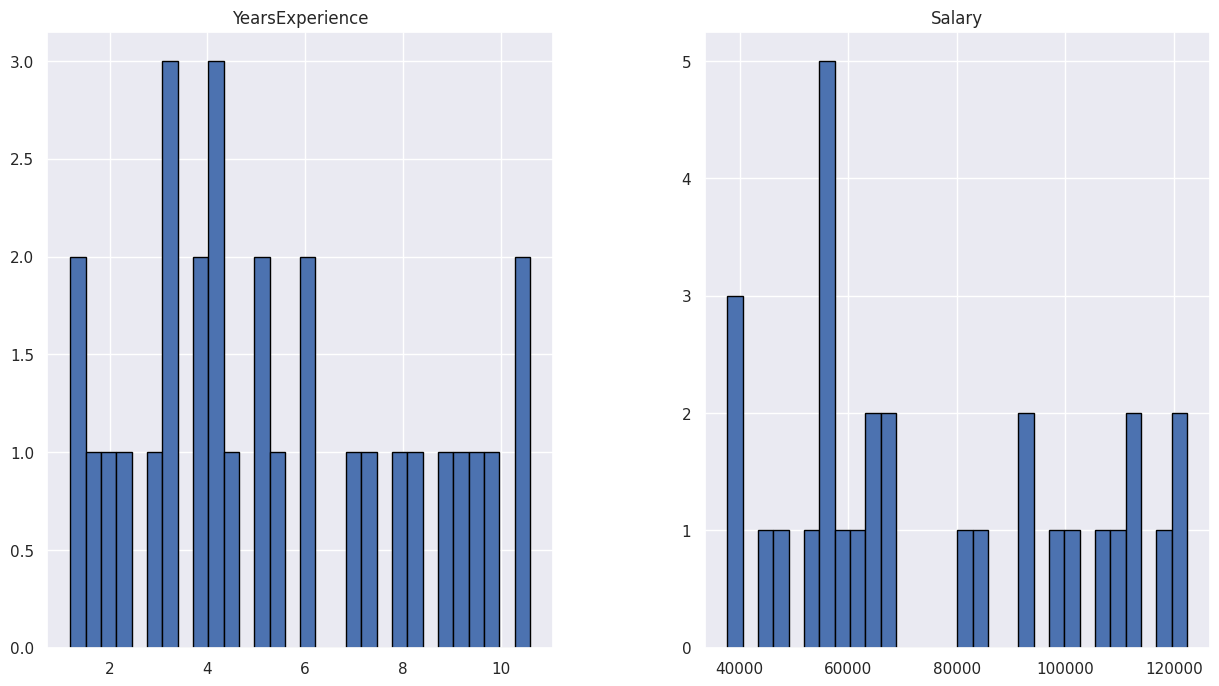

In [40]:
data.hist(figsize=(15,8), bins=30, edgecolor='black')

<Axes: xlabel='Salary', ylabel='YearsExperience'>

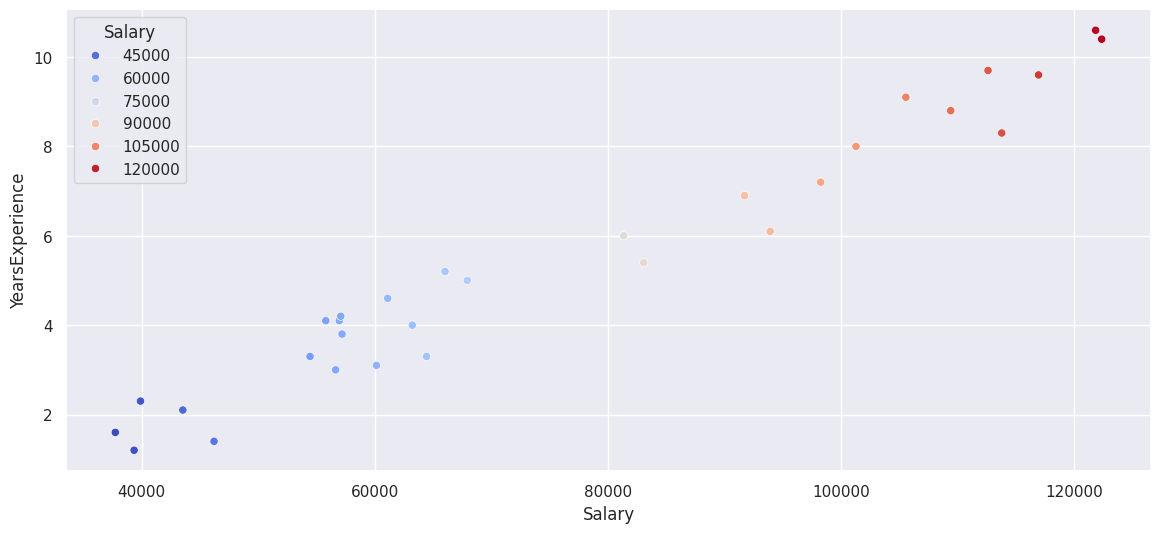

In [41]:
import seaborn as sb

sb.scatterplot(x='Salary', y='YearsExperience', data=data, hue='Salary', palette='coolwarm')

In [16]:
##remove na

data_na = data.dropna()

In [19]:
data_na['YearsExperience'].value_counts()

YearsExperience
3.3     2
4.1     2
1.2     1
5.4     1
10.4    1
9.7     1
9.6     1
9.1     1
8.8     1
8.3     1
8.0     1
7.2     1
6.9     1
6.1     1
6.0     1
5.2     1
1.4     1
5.0     1
4.6     1
4.2     1
4.0     1
3.8     1
3.1     1
3.0     1
2.3     1
2.1     1
1.6     1
10.6    1
Name: count, dtype: int64

In [42]:
dummies = pd.get_dummies(data['YearsExperience'], dtype=int)

In [43]:
data.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [44]:
data.corr() #how the data correlate with each other

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

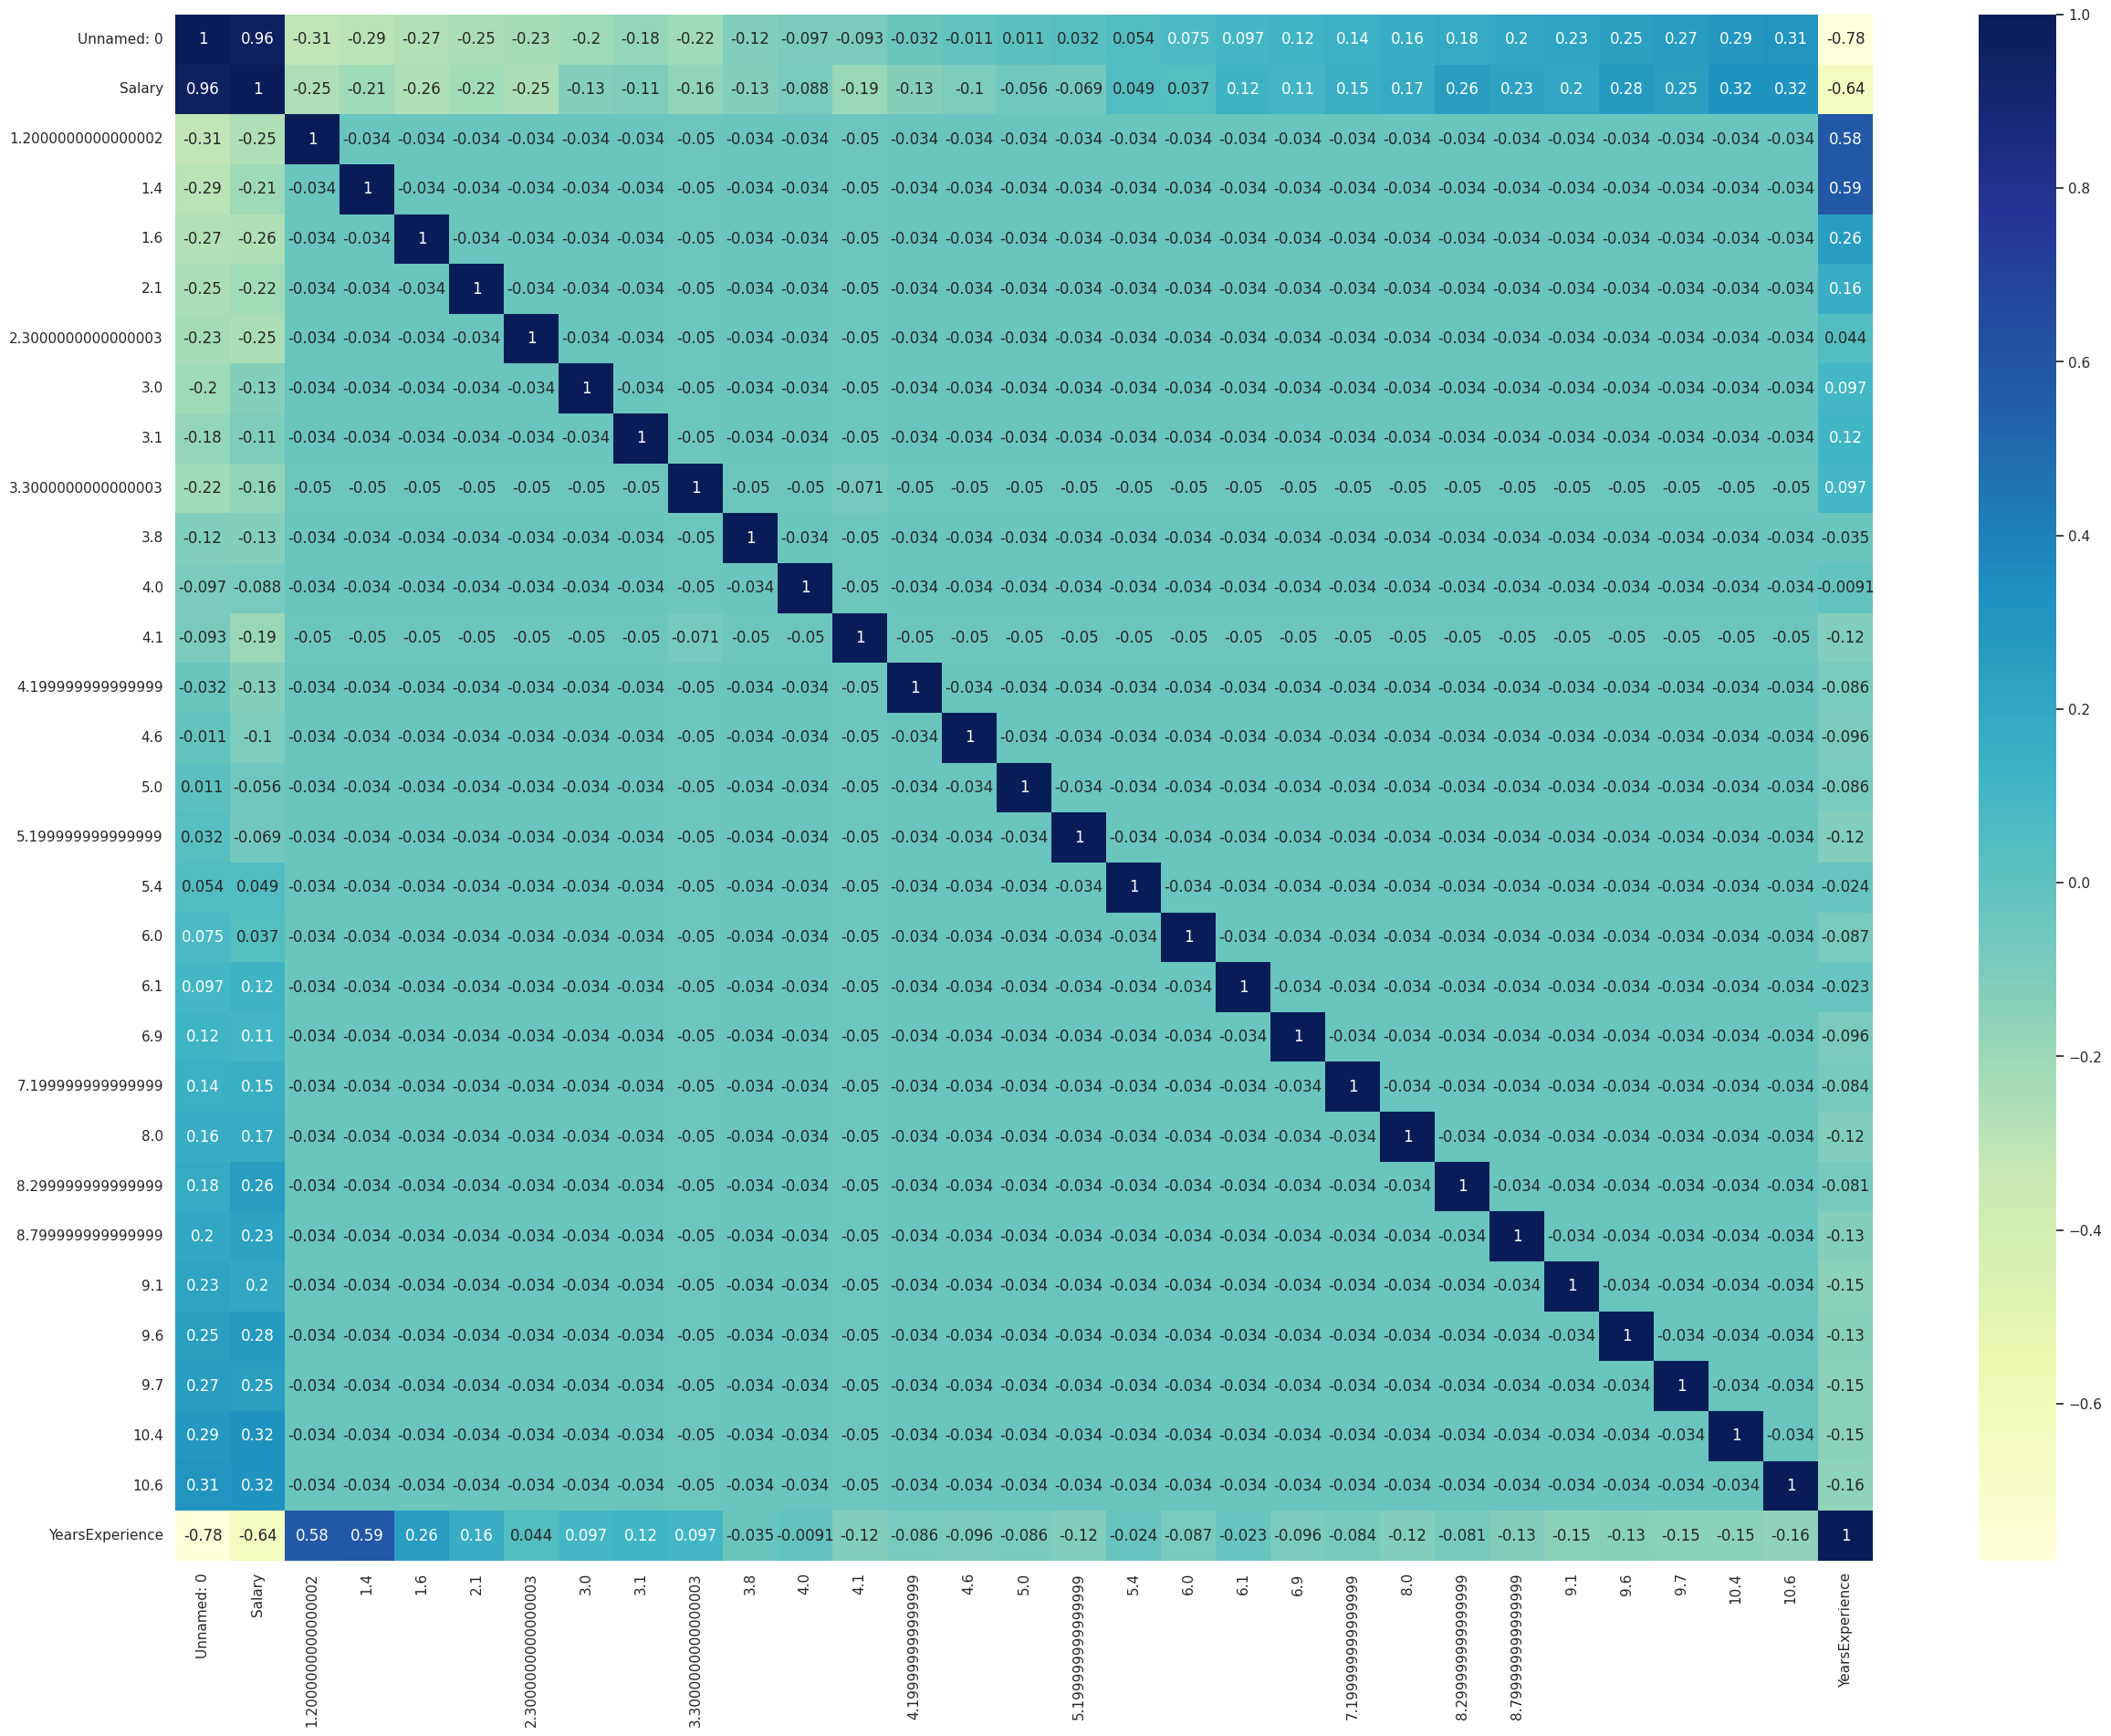

In [65]:
sb.set(rc = {'figure.figsize': (30,22)}) #heatmap to find correlation between the dataset
sb.heatmap(data_na.corr(), annot=True, cmap='YlGnBu')

In [46]:
data.corr()['Salary'].sort_values(ascending=False)

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

<Axes: xlabel='Salary', ylabel='YearsExperience'>

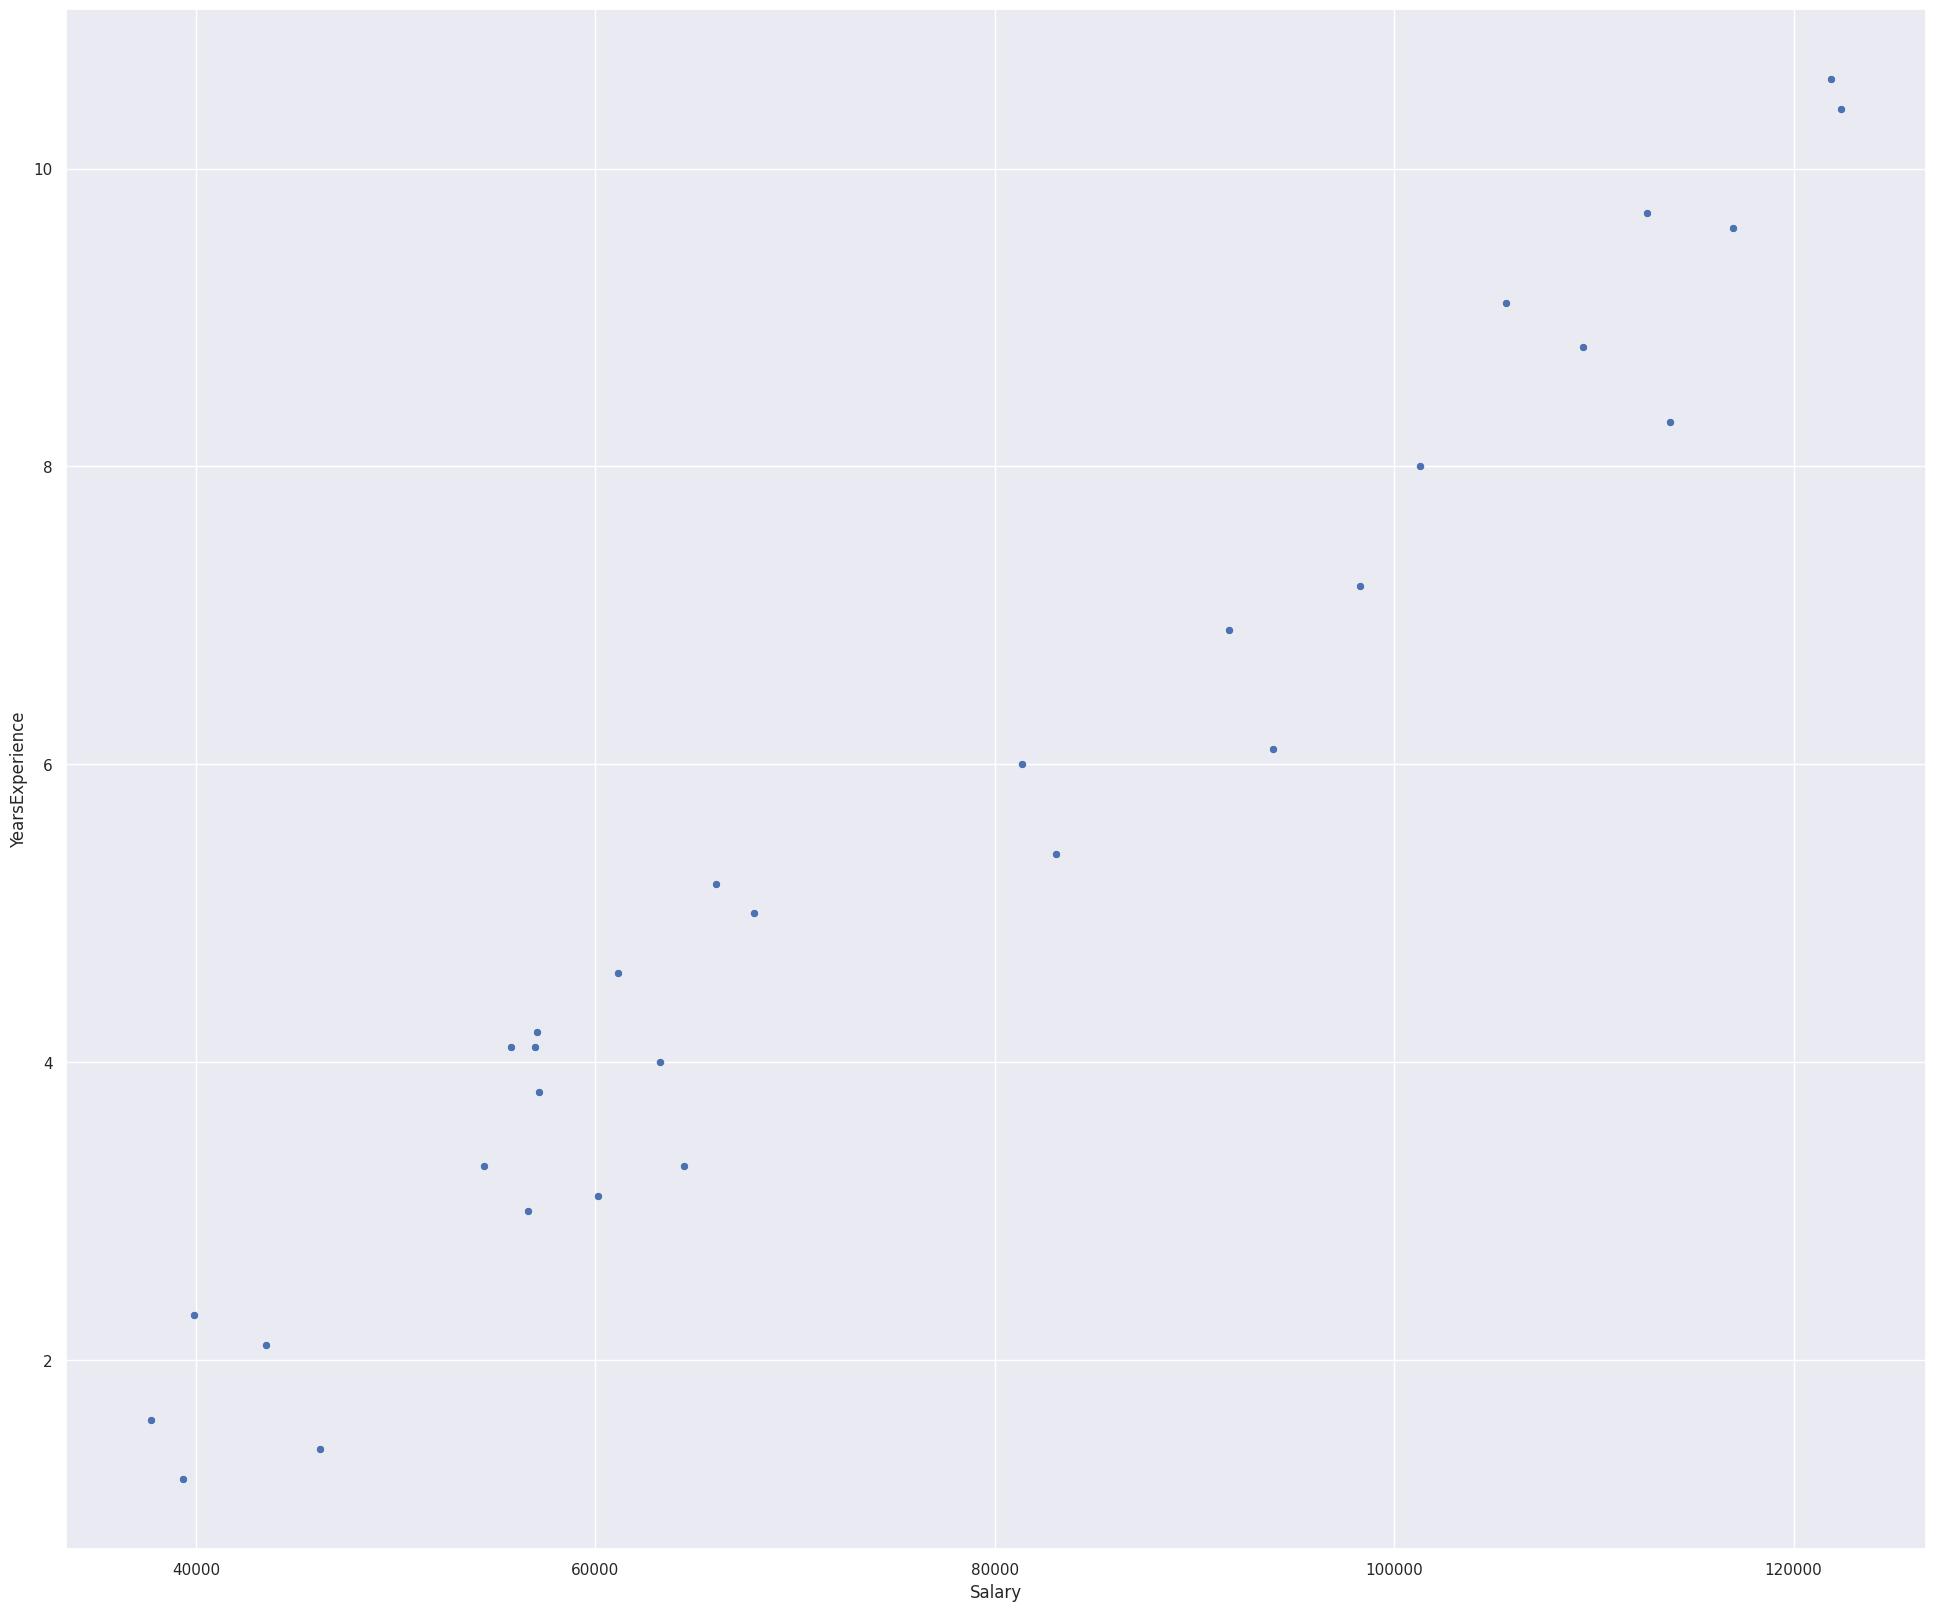

In [63]:
#scatterplot to show linearity
sb.scatterplot(x=data['Salary'], y=data['YearsExperience'])

<Axes: >

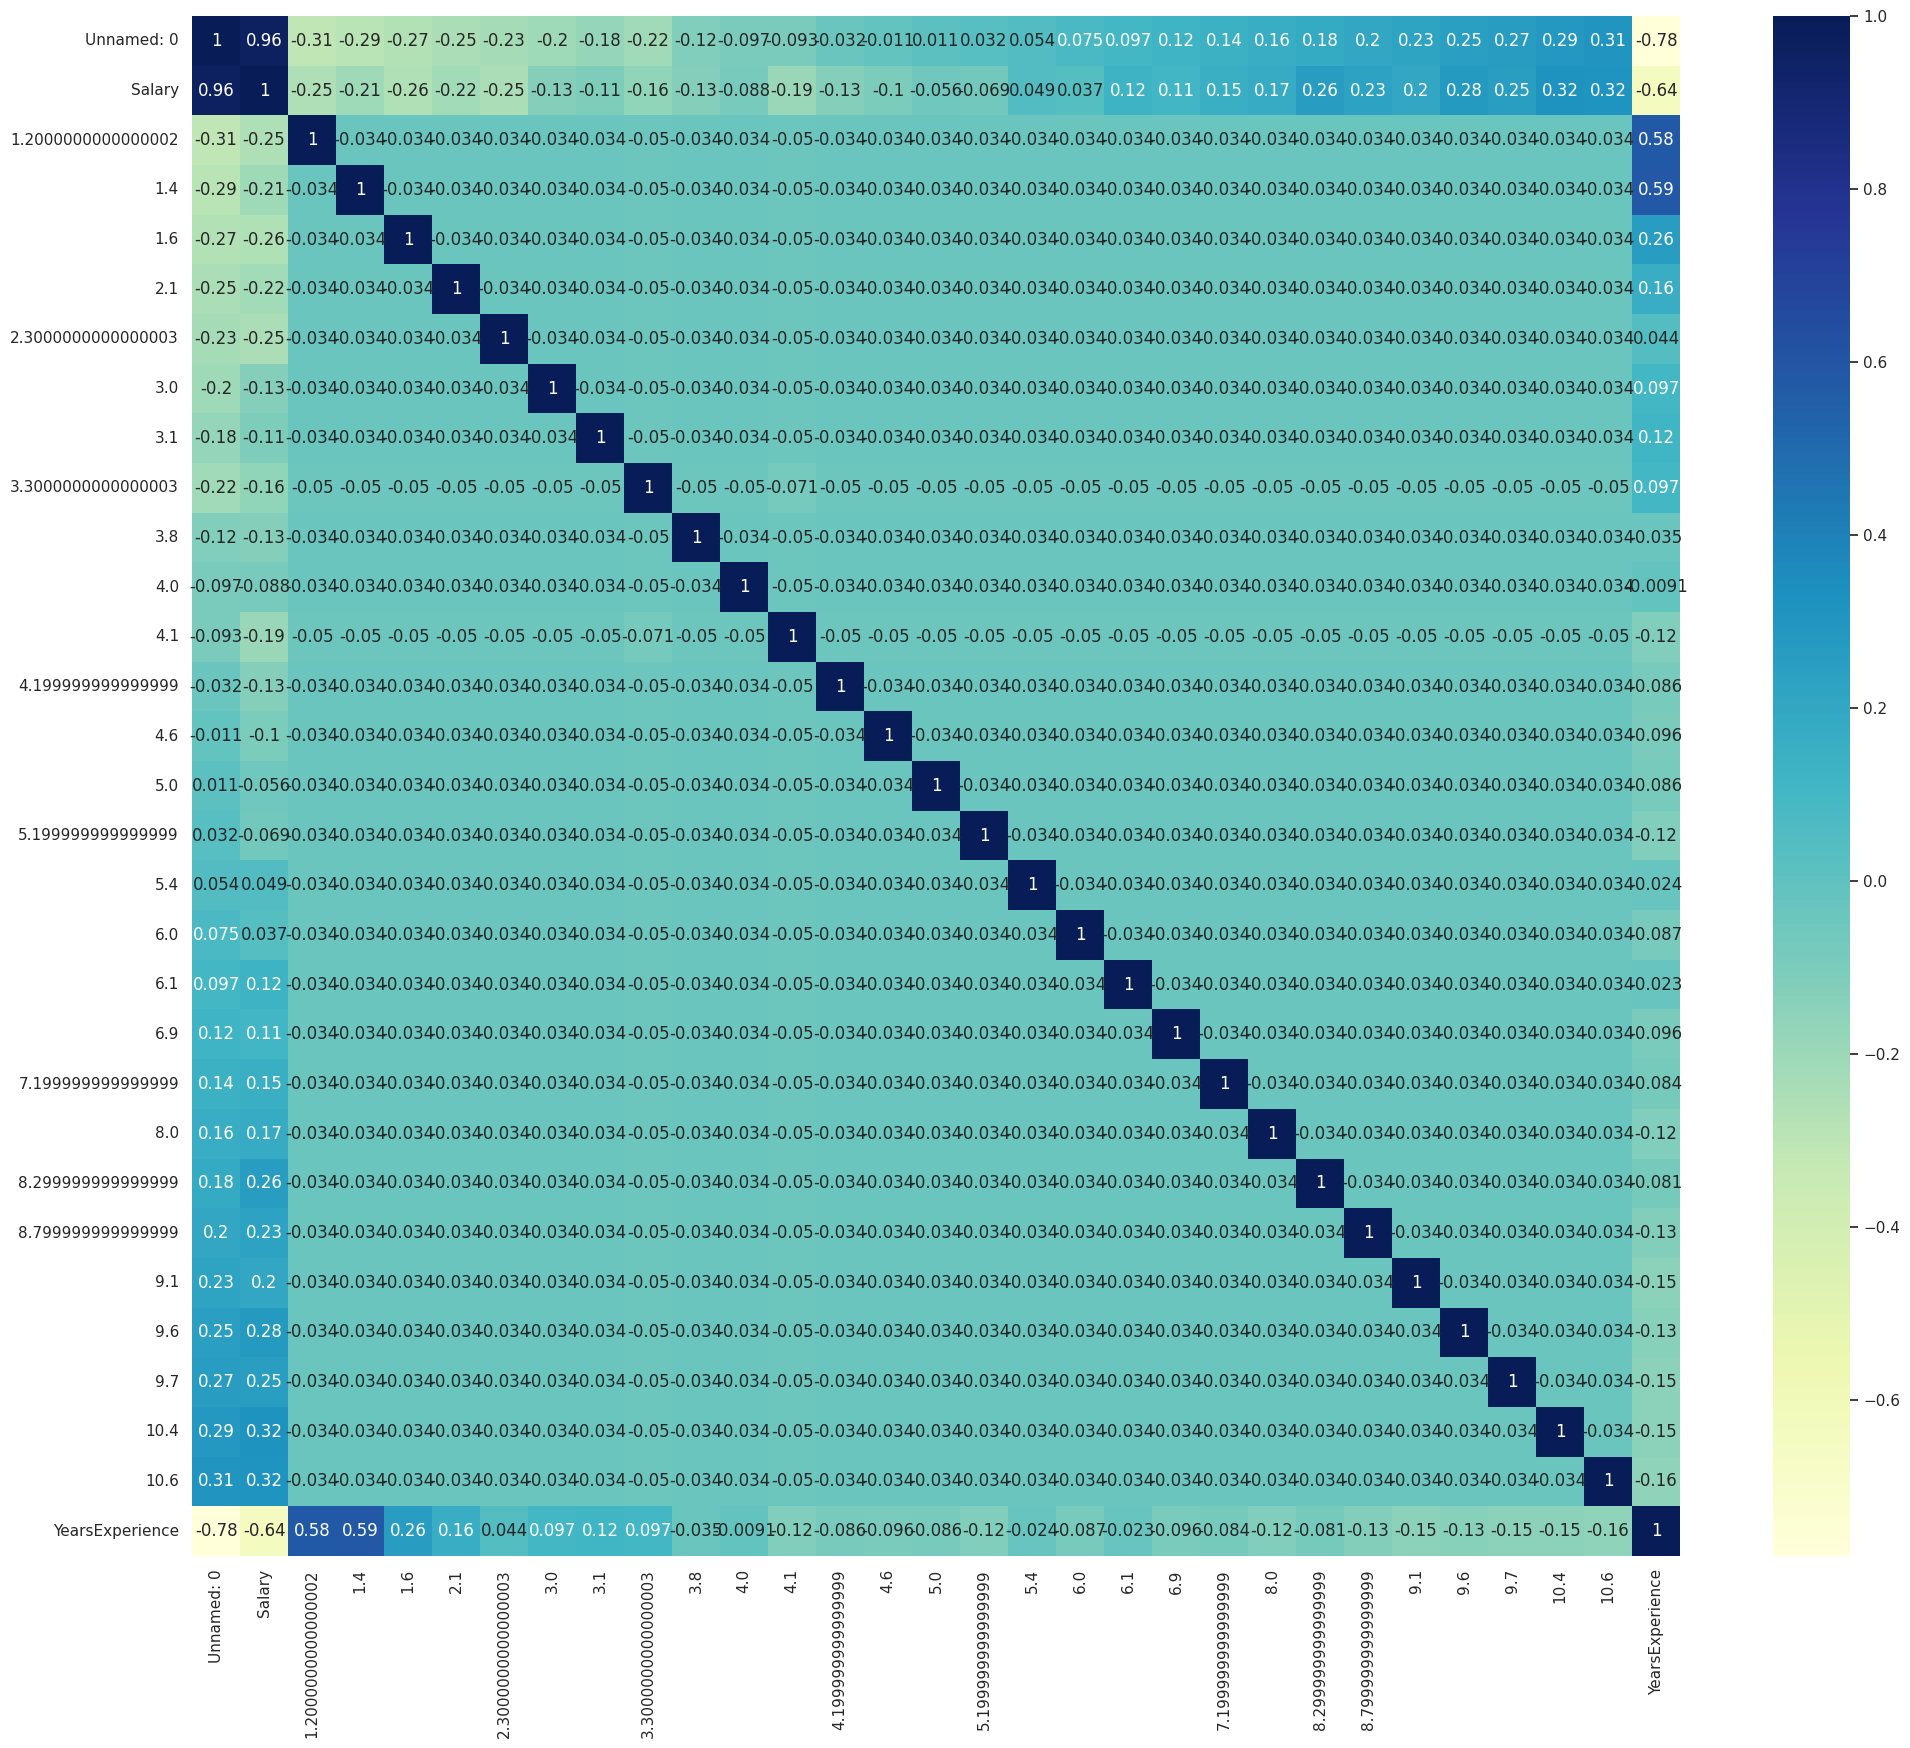

In [60]:
data_na['YearsExperience']=data_na['Salary']/data['YearsExperience'] #invent new feature bedroom_ratio
sb.set(rc = {'figure.figsize': (24,20)})
sb.heatmap(data_na.corr(), annot=True, cmap='YlGnBu')

In [50]:
#drop the mean house values from input data and leave everything else
x=data.drop(['YearsExperience'], axis=1)
#only use the median housing values
y=data['Salary']

In [51]:
#import train_test_split model from sklearn library
from sklearn.model_selection import train_test_split

x_train, x_learn, y_train, y_learn = train_test_split(x,y, test_size=.20)

In [54]:
#train the AI
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [55]:
#use the trained data to do prediction
prediction = model.predict(x_learn)

#compare prediction with actual data
compare = {'Prediction': prediction, 'Real Values': y_learn}
pd.DataFrame(compare)

,Prediction,Real Values
18,81364.0,81364
0,39344.0,39344
6,60151.0,60151
20,91739.0,91739
21,98274.0,98274
22,101303.0,101303


In [56]:
print(model.score(x_learn,y_learn))

1.0


In [57]:
#over fitting and under fitting

print(model.score(x_train, y_train))

1.0
